# Taller 3

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller3.ipynb, con su primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en google colab** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Jueves 18 de Mayo 11:59 pm**

## Librerias

In [100]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate
import sympy as sym
from sympy import symbols
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as ani
plt.style.use('dark_background')

In [101]:
from matplotlib import rc
rc("animation", html = "jshtml")
sym.init_printing()
matplotlib.rcParams['animation.embed_limit'] = 2**128
import matplotlib.ticker as ticker

# Problema 1

El siguiente codigo de C++ se obtienen los puntos de un tiro parabólico con los siguientes parametros, 

$x_0 = 0\text{ m }$,
$y_0 = 10\text{ m }$,
$v_{x0} = 10\text{ m/s }$,
$v_{y0} = 10\text{ m }$,
$t_f = 2.733 \text{ s }$, 
$dt = 0.01 \text{ s }$

y tomando gravedad como, 

$g = 10 \text{ m/s }^2$

Además el código en python, y el script gráfican en matplotlib estos puntos, 

problema: Modificar el código de `C++` para incluir un tiro parabólico con fricción del aire y con las mismas condiciones iniciales usando el método de Runge-Kutta de 4to orden, al final debe gráficar el tiro parabólico normal y el tiro parabólico con fricción en la misma gráfica. 

Tome el coeficiente de fricción del aire y la masa como se definen en el archivo de C++.

$b = 0.2 \text{ kg/s }$,
$m = 1 \text{ kg }$.

El método de Runge-Kutta para ecuaciones diferenciales de segundo orden tiene la forma, 

 ![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/runge%20kutta%202nd%20order.png)


In [102]:
%%writefile parabolico.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <cmath>
#define g 10.0
#define m 1
#define b 0.2

using namespace std;

double a_x(double vx, double t) {
    return -(b/m)*vx;
}

double a_y(double vy, double t) {
    return -(b/m)*vy-g;
}

int main() {
    float x_init = 0;
    float y_init = 10;
    float vx_init = 10;
    float vy_init = 10;

    float dt = 0.01;
    float t_total = 2.733;
    cout << "total_time:" <<  t_total << endl;
    int N = t_total/dt;
    cout << N;

    double pos_x[N];
    double pos_y[N];

    for(int i = 0; i <N; i++){
        pos_x[i] = vx_init*i*dt;
        pos_y[i] = y_init + vy_init*i*dt - 0.5*g*pow(i*dt, 2);
    }

    for(int i = 0; i <N; i++){
        cout << pos_x[i] << " ";
        cout << pos_y[i] << " ";
    }

    std::ofstream myfile;
    myfile.open ("x_values.csv");
    myfile << "x,y\n";
    for(int i = 0; i <N; i++){
        myfile << pos_x[i] << ",";
        myfile << pos_y[i] << "\n";
    }
    myfile.close();

    double x[N];
    double y[N];
    double vx = vx_init;
    double vy = vy_init;
    double h = dt;

    double k1_x, k1_y, l1_x, l1_y;
    double k2_x, k2_y, l2_x, l2_y;
    double k3_x, k3_y, l3_x, l3_y;
    double k4_x, k4_y, l4_x, l4_y;

    x[0] = x_init;
    y[0] = y_init;

    for(int i=1; i<N; i++){

        k1_x = h*vx;
        k1_y = h*vy;

        l1_x = h*a_x(vx, i*dt);
        l1_y = h*a_y(vy, i*dt);
        k2_x = h*(vx + 0.5*l1_x);
        k2_y = h*(vy + 0.5*l1_y);

        l2_x = h*a_x(vx+0.5*l1_x, i*dt+0.5*h);
        l2_y = h*a_y(vy+0.5*l1_y, i*dt+0.5*h);
        k3_x = h*(vx + 0.5*l2_x);
        k3_y = h*(vy + 0.5*l2_y);

        l3_x = h*a_x(vx+0.5*l2_x, i*dt+0.5*h);
        l3_y = h*a_y(vy+0.5*l2_y, i*dt+0.5*h);
        k4_x = h*(vx + l3_x);
        k4_y = h*(vy + l3_y);

        l4_x = h*a_x(vx+l3_x, i*dt+h);
        l4_y = h*a_y(vy+l3_y, i*dt+h);

        x[i] = x[i-1] + (0.166667)*(k1_x + 2*k2_x + 2*k3_x + k4_x);
        y[i] = y[i-1] + (0.166667)*(k1_y + 2*k2_y + 2*k3_y + k4_y);

        vx = vx + (0.166667)*(l1_x + 2*l2_x + 2*l3_x + l4_x);
        vy = vy + (0.166667)*(l1_y + 2*l2_y + 2*l3_y + l4_y);
    }

    for(int i = 0; i<N; i++){
        cout << x[i] << " ";
        cout << y[i] << " ";
    }

    myfile.open("x_values_damped.csv");
    myfile << "x,y\n";
    for(int i = 0; i <N; i++){
        myfile << x[i] << ",";
        myfile << y[i] << "\n";
    }
    myfile.close();

    return 0;
}

Overwriting parabolico.cpp


In [103]:
%%script bash

g++ parabolico.cpp -o parabolico
./parabolico

total_time:2.733
2730 10 0.1 10.0995 0.2 10.198 0.3 10.2955 0.4 10.392 0.5 10.4875 0.6 10.582 0.7 10.6755 0.8 10.768 0.9 10.8595 1 10.95 1.1 11.0395 1.2 11.128 1.3 11.2155 1.4 11.302 1.5 11.3875 1.6 11.472 1.7 11.5555 1.8 11.638 1.9 11.7195 2 11.8 2.1 11.8795 2.2 11.958 2.3 12.0355 2.4 12.112 2.5 12.1875 2.6 12.262 2.7 12.3355 2.8 12.408 2.9 12.4795 3 12.55 3.1 12.6195 3.2 12.688 3.3 12.7555 3.4 12.822 3.5 12.8875 3.6 12.952 3.7 13.0155 3.8 13.078 3.9 13.1395 4 13.2 4.1 13.2595 4.2 13.318 4.3 13.3755 4.4 13.432 4.5 13.4875 4.6 13.542 4.7 13.5955 4.8 13.648 4.9 13.6995 5 13.75 5.1 13.7995 5.2 13.848 5.3 13.8955 5.4 13.942 5.5 13.9875 5.6 14.032 5.7 14.0755 5.8 14.118 5.9 14.1595 6 14.2 6.1 14.2395 6.2 14.278 6.3 14.3155 6.4 14.352 6.5 14.3875 6.6 14.422 6.7 14.4555 6.8 14.488 6.9 14.5195 7 14.55 7.1 14.5795 7.2 14.608 7.3 14.6355 7.4 14.662 7.5 14.6875 7.6 14.712 7.7 14.7355 7.8 14.758 7.9 14.7795 8 14.8 8.1 14.8195 8.2 14.838 8.3 14.8555 8.4 14.872 8.5 14.8875 8.6 14.902 8.7 14.9155 8.

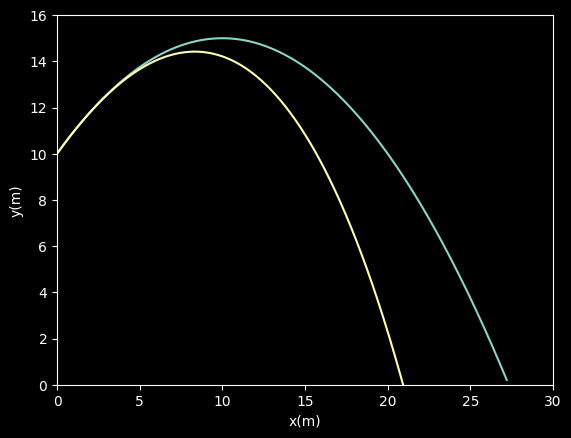

In [104]:
df = pd.read_csv("./x_values.csv")
df_damped = pd.read_csv("./x_values_damped.csv")
x = np.array(df["x"])
y = np.array(df["y"])
x_damped = np.array(df_damped["x"])
y_damped = np.array(df_damped["y"])

plt.ylim([0, 16])
plt.xlim([0, 30])
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.plot(x, y)
plt.plot(x_damped, y_damped)
plt.show()

In [105]:
%%script bash

rm parabolico x_values.csv

## Problema 2

Considere el sistema resorte pendulo que se muestra en la figura, el resorte está atado a una masa $m_1$ y el pendulo a una masa $m_2$, considere $l_0$ la longitud sin estirar del resorte, y $l$ la longitud del pendulo. El resorte con la masa $m_1$ se mueve en la dirección $x$ sin fricción.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/image2_p2.png)

a) Demuestre que las ecuaciones de Newton y de ligadura del sistema resorte-pendulo son las siguientes, considerando la posición de la masa unida al resorte $x_1 = 0$ cuando el resorte está sin estirar, 

\begin{align}
m_1 \ddot x_1 &= - k x_1 + T \sin \theta \\
m_2 \ddot x_2 &= - T \sin \theta \\
m_2 \ddot y_2 &=  T \cos \theta - m_2g \\
\ddot x_2 &= \ddot x_1 - \dot\theta^2 l \sin \theta + \ddot\theta l \cos \theta \\
\ddot y_2 &= \dot\theta^2 l \cos \theta + \ddot\theta l \sin \theta\\
\end{align}

Sus ecuaciones aquí,

\begin{align}
\sum F_ x1 &= -kx_1+T \sin \theta = m_1 \ddot x_1 \\
\sum F_ y1 &= N-m_1 g = 0 \\
\sum F_ x2 &=  - T \sin \theta = m_2 \ddot x_2 \\
\sum F_ y2 &= T \cos \theta - m_2 g = m_2 \ddot y_2 \\
\thinspace \\
x_2 &= x_1 + l \sin \theta + l_0\\
\dot x_2 &= \dot x_1 + \dot \theta l \cos \theta \\
\ddot x_2 &= \ddot x_1 - \dot \theta^2 l \sin \theta + \ddot \theta l \cos \theta
\thinspace \\
\\
y_2 &= - l \cos \theta \\
\dot y_2 &= \dot \theta l \sin \theta \\
\ddot y_2 &= \dot \theta^2 l \cos \theta + \ddot \theta l \sin \theta \\
\end{align}


b) Dado que el sistema se puede especificar en términos de solamente dos coordenadas $(x_1, \theta)$ independientes, use la libreria **sympy** para resolver las ecuaciones y demonstrar que se obtiene las dos siguientes ecuaciones diferenciales ordinarias de segundo grado,

\begin{equation}
\ddot x_1 = \frac{-k x_1 + m_2 \dot \theta^2 l \sin \theta}{ m_1+m_2}- \frac{m_2 (k x_1 - m_2 \dot \theta^2 l \sin \theta -g(m_1 + m_2) \tan \theta )}{ (m_1+m_2) (m_1\tan^2 \theta + m_2) }
\end{equation}

\begin{equation}
\ddot \theta = \frac{k x_1 - m_2 \dot \theta^2 l \sin \theta - g(m_1+m_2) \tan \theta}{ l(m_1+m_2)\sin \theta \tan \theta + m_1 l \cos \theta }
\end{equation}

Se deben imprimir las dos ecuaciones resultantes de forma simplificada en el notebook. 

In [106]:
x1, x2, y2, theta, k, m1, m2, l, g, T = sym.symbols('x1 x2 y2 theta k m1 m2 l g T')
x1_dot, x2_dot, y2_dot, theta_dot = sym.symbols('x1_dot x2_dot y2_dot theta_dot')
x1_ddot, x2_ddot, y2_ddot, theta_ddot = sym.symbols('x1_ddot x2_ddot y2_ddot theta_ddot')

eq1 = sym.Eq(m1 * x1_ddot, -k * x1 + T * sym.sin(theta))
eq2 = sym.Eq(m2 * x2_ddot, -T * sym.sin(theta))
eq3 = sym.Eq(m2 * y2_ddot, T * sym.cos(theta) - m2 * g)
eq4 = sym.Eq(x2_ddot, x1_ddot - theta_dot**2 * l * sym.sin(theta) + theta_ddot * l * sym.cos(theta))
eq5 = sym.Eq(y2_ddot, theta_dot**2 * l * sym.cos(theta) + theta_ddot * l * sym.sin(theta))

solutions = sym.solve((eq1, eq2, eq3, eq4, eq5), (theta_ddot, x1_ddot, x2_ddot, y2_ddot, T))
sol = []
for i in solutions:
  sol.append(solutions[i])

print("Ecuación para x1_ddot:")
sym.pprint(sym.simplify(sol[1]))

print("\nEcuación para theta_ddot:")
sym.pprint(sym.simplify(sol[0]))

Ecuación para x1_ddot:
g⋅m₂⋅sin(2⋅θ)                    2       
───────────── - k⋅x₁ + l⋅m₂⋅θ_dot ⋅sin(θ)
      2                                  
─────────────────────────────────────────
                        2                
             m₁ + m₂⋅sin (θ)             

Ecuación para theta_ddot:
                                                     2         
                                           l⋅m₂⋅θ_dot ⋅sin(2⋅θ)
-g⋅m₁⋅sin(θ) - g⋅m₂⋅sin(θ) + k⋅x₁⋅cos(θ) - ────────────────────
                                                    2          
───────────────────────────────────────────────────────────────
                        ⎛           2   ⎞                      
                      l⋅⎝m₁ + m₂⋅sin (θ)⎠                      


## Problema 3

A partir de las ecuaciones de segundo grado del problema 1, resuelva las ecuaciones diferenciales anteriores, con el método de Runge-Kutta (de 4-to u 8-vo orden) y realice una simulación del movimiento, el resultado esperado debe verse como la siguiente simulación, 

https://www.youtube.com/watch?v=yTXhcYtohvk

Para la simulación use los siguientes parametros:

$l_0 = 1 \text{ m}, \quad l = 1 \text{ m}, \quad m_1 = 8 \text{ kg}, \quad m_2 = 10 \text{ kg}, \quad k = 300 \text{ N/m}, \quad \theta_0= 70^\circ, \quad \omega_0 = 0 \quad T_\text{total} = 5 \text{ s}, \quad x_{10} = 1 \text{ m }$, $dt = 0.005 \text{ s }, v_0 = 0$.

In [107]:
# parámetros del problema
# idealmente no modificar mucho esta parte del codigo para facilitar la evaluacion

g = 9.8 # m/s^2
l = 1 # m longitud del pendulo
m1 = 8 # kg
m2 = 10 # kg
k = 300 # N/m
l0 = 1 # m longitud del resorte sin estirar

tiempo = 5 # s
puntos = int(tiempo*50) # numero de puntos a evaluar en la trayectoria

# condiciones iniciales
theta = 70 * np.pi/180 # angulo inicial respecto a la vertical (rad)
x = 1  # posición inicial con respecto a la longitud del resorte sin estirar
x2 = x + l * np.sin(theta) # posición inicial de la masa 2 con respecto a la longitud del resorte sin estirar
y2 = - l * np.cos(theta) # posición inicial de la masa 2 con respecto a la longitud del resorte sin estirar
v = 0.0 # velocidad angular inicial respecto a la vertical (rad/s)
omega = 0

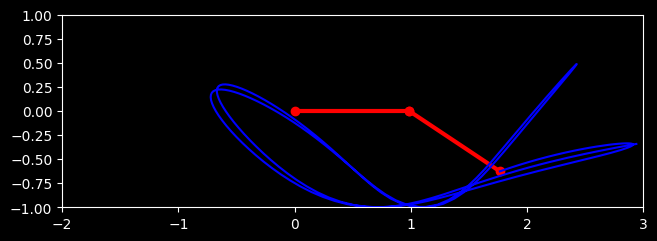

In [108]:
start_time = time.time()

def runge_kutta_4th_order(h, t0, tf, y0):

    num_steps = int((tf - t0) / h)
    t_values = np.linspace(t0, tf, num_steps + 1)
    y_values = np.zeros((num_steps + 1, 4))
    y_values[0] = y0

    def f(t, y):
        x1, x1_dot, theta, theta_dot = y

        x1_ddot = (-k*x1 + m2*theta_dot**2*l*np.sin(theta))/(m1+m2) - (m2*(k*x1 - m2*theta_dot**2*l*np.sin(theta) - g*(m1+m2)*np.tan(theta)))/((m1+m2)*(m1*np.tan(theta)**2 + m2))
        theta_ddot = (k*x1 - m2*theta_dot**2*l*np.sin(theta) - g*(m1+m2)*np.tan(theta))/(l*(m1+m2)*np.sin(theta)*np.tan(theta) + m1*l*np.cos(theta))

        return np.array([x1_dot, x1_ddot, theta_dot, theta_ddot])

    for i in range(num_steps):
        t = t_values[i]
        y = y_values[i]

        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)

        y_values[i+1] = y + (k1 + 2*k2 + 2*k3 + k4)/6

    return t_values, y_values

y0 = np.array([x, v, theta, omega])

t_values, y_values = runge_kutta_4th_order(tiempo/puntos, 0, tiempo, y0)

x1_values = y_values[:, 0]
theta_values = y_values[:, 2]

x_pendulo = x1_values + l * np.sin(theta_values)
y_pendulo = -l * np.cos(theta_values)

fig, ax = plt.subplots(figsize=(7.5, 2.5))
ax.set_xlim(-l0-l, l0+l+1)
ax.set_ylim(-l, l)

line_resorte, = ax.plot([], [], 'r-o', markersize=6, linewidth=3)
line_pendulo, = ax.plot([], [], 'r-o', markersize=6, linewidth=3)
line_trayectoria, = ax.plot([], [], 'b-')

def init():
    line_resorte.set_data([], [])
    line_pendulo.set_data([], [])
    line_trayectoria.set_data([], [])
    return line_resorte, line_pendulo, line_trayectoria

def update(frame):
    x_resorte = [0, x1_values[frame]+1]
    y_resorte = [0, 0]
    x_pendulo = [x1_values[frame]+1, x1_values[frame]+1 + l * np.sin(theta_values[frame])]
    y_pendulo = [0, -l * np.cos(theta_values[frame])]

    line_resorte.set_data(x_resorte, y_resorte)
    line_trayectoria.set_data(x1_values[:frame+1]+1 + l * np.sin(theta_values[:frame+1]), -l * np.cos(theta_values[:frame+1]))
    line_pendulo.set_data(x_pendulo, y_pendulo)
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.25))

    return line_resorte, line_pendulo, line_trayectoria

ani.FuncAnimation(fig, update, frames=len(t_values), init_func=init, blit=True)

In [109]:
print("Tiempo usado en crear la animación (s):", time.time() - start_time)

Tiempo usado en crear la animación (s): 19.14975905418396
